In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
processed_dir = 'C:\\Users\\soup\\Desktop\\DS400-Capstone\\DS400-Capstone\\main\\Processed_datasets\\Processed_Network_dataset'

data1 = pd.read_csv(processed_dir+'\\Network_dataset_1.csv')

In [28]:
sets = os.listdir(processed_dir)
data = pd.DataFrame()
for dataset in sets:
    cur = pd.read_csv(processed_dir+"\\"+dataset)
    data = pd.concat([cur, data], axis=0)

In [4]:
len(data)

1000000

In [5]:
data.columns

Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [12]:
val_counts = data['label'].value_counts()
diff = val_counts[1]-val_counts[0]

In [13]:
data = data.drop(data[data['label'] == 1.0].sample(n=(diff)).index)

In [14]:
data['label'].value_counts()

0    208679
1    208679
Name: label, dtype: int64

In [16]:
data.head(5)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [17]:
data['service'][0]

'-'

In [18]:
data.replace(to_replace='-', value=np.nan, inplace=True)

<AxesSubplot:>

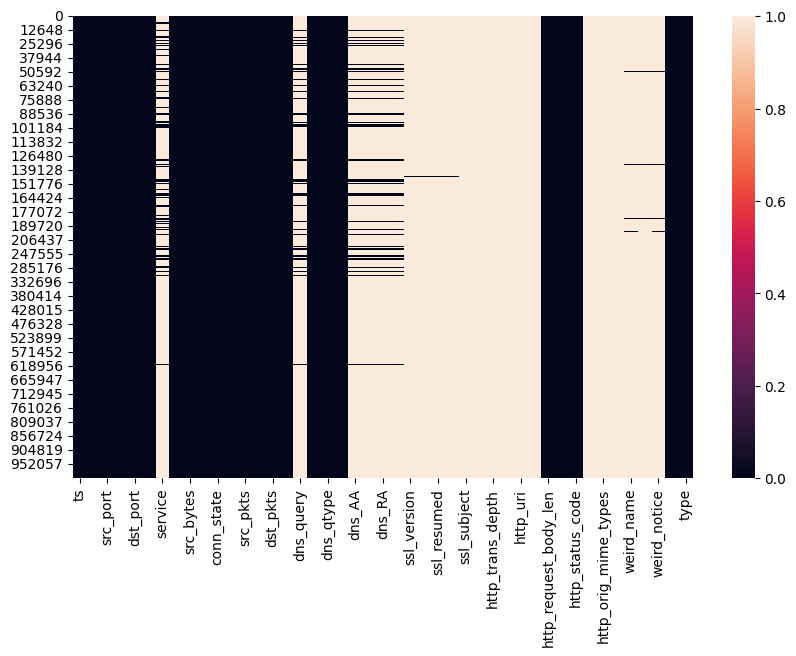

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna())